In [1]:
from GenZ import decode_moddeling, prefill_moddeling

from GenZ.system import System
import pandas as pd
from GenZ.analye_model import *

model = 'llama_7b'
# configs
# batch_size = 96
batch_size = 1
input_tokens = 128
output_tokens = 1024


Reset batch: 120


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 120 12288 1 4096],115.488722,12079.595520,0.937500,96.000000,2.812500,99.750000,0.012214,0.028651,M,0.426307,28650.620404,15.394041,421.617241,12213.948959,28650.620404,0.028651,1
1,Logit,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000127,0.034787,M,0.003657,34787.047143,18.691156,3.617126,127.228635,34787.047143,0.034787,1
2,Logit,[120 32 1 1 128],0.498054,0.983040,0.937500,0.937500,0.007324,1.882324,0.000001,0.000539,M,0.001844,538.942861,0.289575,1.824015,0.993974,538.942861,0.000539,1
3,Attend,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000127,0.034787,M,0.003657,34787.047143,18.691156,3.617126,127.228635,34787.047143,0.034787,1
4,Attend,[120 32 1 1 128],0.498054,0.983040,0.007324,0.937500,0.937500,1.882324,0.000001,0.000539,M,0.001844,538.942861,0.289575,1.824015,0.993974,538.942861,0.000539,1
5,GEMM,[ 120 4096 1 4096],113.357934,4026.531840,0.937500,32.000000,0.937500,33.875000,0.004071,0.009730,M,0.418441,9729.721967,5.227801,413.838325,4071.316320,9729.721967,0.009730,1
6,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.010942,0.025694,M,0.425841,25694.230024,13.805566,421.156980,10941.662609,25694.230024,0.025694,1
7,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.010942,0.025694,M,0.425841,25694.230024,13.805566,421.156980,10941.662609,25694.230024,0.025694,1
8,GEMM,[ 120 4096 1 11008],115.362648,10821.304320,2.519531,86.000000,0.937500,89.457031,0.010942,0.025694,M,0.425841,25694.230024,13.805566,421.156980,10941.662609,25694.230024,0.025694,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,48823.66464,649.51074,386.00000,386.00000,121.87500,0.18612,186115.01245


TFLOPS: 989.0
MEM BW: 3.3203125
[[0.         0.52117896]
 [2.4328175  2.99519629]
 [2.83075751 2.99519629]]
[0.         2.4328175  2.83075751]
[0.52117896 2.99519629 2.99519629]
Number of points: 9
115.48872180451127
421.6172407261353
0.9846153846153847
3.617125635368711
0.4980544747081712
1.8240152562099148
0.9846153846153847
3.617125635368711
0.4980544747081712
1.8240152562099143
113.35793357933579
413.83832484557934
115.36264791930483
421.1569799943702
115.36264791930483
421.1569799943702
115.36264791930483
421.1569799943702


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 120 12288 1 4096],115.488722,12079.595520,0.937500,96.000000,2.812500,99.750000,0.012214,0.028651,M,0.426307,28650.620404,3.882934,421.617241,12213.948959,28650.620404,0.028651,1
1,Logit,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000127,0.034787,M,0.003657,34787.047143,4.714586,3.617126,127.228635,34787.047143,0.034787,1
2,Logit,[ 120 32 1 1024 128],0.991288,1006.632960,0.937500,960.000000,7.500000,968.437500,0.001018,0.276411,M,0.003682,276411.467907,37.461232,3.641792,1017.829080,276411.467907,0.276411,1
3,Attend,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000127,0.034787,M,0.003657,34787.047143,4.714586,3.617126,127.228635,34787.047143,0.034787,1
4,Attend,[ 120 32 1 1024 128],0.991288,1006.632960,7.500000,960.000000,0.937500,968.437500,0.001018,0.276411,M,0.003682,276411.467907,37.461232,3.641792,1017.829080,276411.467907,0.276411,1
5,GEMM,[ 120 4096 1 4096],113.357934,4026.531840,0.937500,32.000000,0.937500,33.875000,0.004071,0.009730,M,0.418441,9729.721967,1.318641,413.838325,4071.316320,9729.721967,0.009730,1
6,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.010942,0.025694,M,0.425841,25694.230024,3.482263,421.156980,10941.662609,25694.230024,0.025694,1
7,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.010942,0.025694,M,0.425841,25694.230024,3.482263,421.156980,10941.662609,25694.230024,0.025694,1
8,GEMM,[ 120 4096 1 11008],115.362648,10821.304320,2.519531,86.000000,0.937500,89.457031,0.010942,0.025694,M,0.425841,25694.230024,3.482263,421.156980,10941.662609,25694.230024,0.025694,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,50834.96448,2582.62109,386.00000,386.00000,968.43750,0.73786,737860.06254


TFLOPS: 989.0
MEM BW: 3.3203125
[[0.         0.52117896]
 [2.4328175  2.99519629]
 [2.83075751 2.99519629]]
[0.         2.4328175  2.83075751]
[0.52117896 2.99519629 2.99519629]
Number of points: 9
115.48872180451127
421.6172407261353
0.9846153846153847
3.617125635368711
0.9912875121006777
3.6417915928761495
0.9846153846153847
3.617125635368711
0.9912875121006777
3.6417915928761495
113.35793357933579
413.83832484557934
115.36264791930483
421.1569799943702
115.36264791930483
421.1569799943702
115.36264791930483
421.1569799943702
Decode Latency:14.783601199879367 msec
single_pipe_stage:14.783601199879367 msec; single_layer_time:0.4619875374962302 msec
Layers per pipeline stage:32
Error = 59.71427855867312 in latency calc. Avg Decode Latency:14.783601199879367 msec , Latency based on last token : 23.611522001378674 msec
Attn time:19.916704963235293; Linear time:3.6948170381433822; AR time:0; Pipeline Comm time:0.0


/workspace/weixuechao/GenZ-LLM-Analyzer/GenZ/LLM_inference/llm_decode.py:281: UserWarning: Error in latency calc. Avg Decode Latency:14.783601199879367 msec , Latency based on last token : 23.611522001378674 msec, 
 Attn time:19.916704963235293; Linear time:3.6948170381433822; AR time:0; Pipeline Comm time:0.0
  warnings.warn(f"Error in latency calc. Avg Decode Latency:{decode_latency} msec , Latency based on last token : {total_time} msec, \n Attn time:{attn_time}; Linear time:{linear_time}; AR time:{all_reduce_delay * (get_num_layers_per_pipeline_stage(num_layers, pipeline_parallel))}; Pipeline Comm time:{single_stage_pipe_delay * (pipeline_parallel-1)}")


{'Latency': np.float64(14.783601199879367),
 'Throughput': np.float64(8117.1020766563415),
 'Runtime_breakdown': [np.float64(3.6948170381433822),
  np.float64(19.916704963235293),
  0.0],
 'is_offload': False}

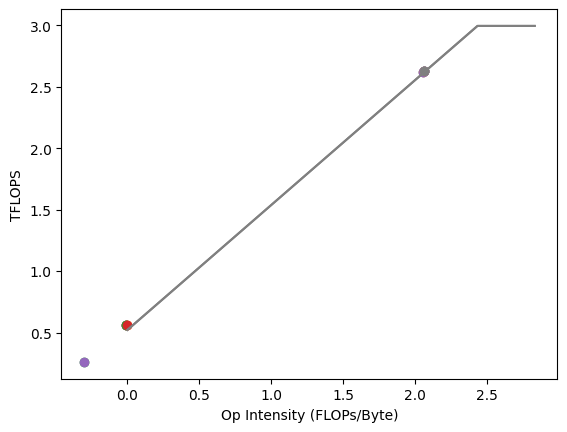

In [2]:
decode_moddeling(model=model,
                 batch_size=batch_size,
                 reset_batch_size=True,
                 Bb=1,
                 input_tokens=input_tokens,
                 output_tokens=output_tokens,
                 model_profilling=False,
                 system_name='H100_GPU',
                 bits='bf16',
                 tensor_parallel=1,
                 pipeline_parallel=1,
                 debug=True,
                 time_breakdown=True)

,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 1 12288 1 4096],0.999675,100.663296,0.007812,96.000000,0.023438,96.031250,0.000702,0.027583,M,0.025450,27582.505170,24.738645,3.649534,701.975565,27582.505170,0.027583,1
1,Logit,[ 1 32 1 128 128],0.984615,1.048576,0.007812,1.000000,0.007812,1.015625,0.000007,0.000290,M,0.025224,289.892060,0.260003,3.617126,7.312245,289.892060,0.000290,1
2,Logit,[ 1 32 1 1 128],0.498054,0.008192,0.007812,0.007812,0.000061,0.015686,0.000000,0.000004,M,0.012720,4.491191,0.004028,1.824015,0.057127,4.491191,0.000004,1
3,Attend,[ 1 32 1 128 128],0.984615,1.048576,0.007812,1.000000,0.007812,1.015625,0.000007,0.000290,M,0.025224,289.892060,0.260003,3.617126,7.312245,289.892060,0.000290,1
4,Attend,[ 1 32 1 1 128],0.498054,0.008192,0.000061,0.007812,0.007812,0.015686,0.000000,0.000004,M,0.012720,4.491191,0.004028,1.824015,0.057127,4.491191,0.000004,1
5,GEMM,[ 1 4096 1 4096],0.999512,33.554432,0.007812,32.000000,0.007812,32.015625,0.000234,0.009196,M,0.025446,9195.664350,8.247557,3.648940,233.991855,9195.664350,0.009196,1
6,GEMM,[ 1 11008 1 4096],0.999665,90.177536,0.007812,86.000000,0.020996,86.028809,0.000629,0.024710,M,0.025450,24709.561292,22.161912,3.649500,628.853110,24709.561292,0.024710,1
7,GEMM,[ 1 11008 1 4096],0.999665,90.177536,0.007812,86.000000,0.020996,86.028809,0.000629,0.024710,M,0.025450,24709.561292,22.161912,3.649500,628.853110,24709.561292,0.024710,1
8,GEMM,[ 1 4096 1 11008],0.999665,90.177536,0.020996,86.000000,0.007812,86.028809,0.000629,0.024710,M,0.025450,24709.561292,22.161912,3.649500,628.853110,24709.561292,0.024710,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,406.86387,388.19592,386.00000,386.00000,96.03125,0.11150,111495.61990


TFLOPS: 143.4
MEM BW: 3.3203125
[[0.         0.52117896]
 [1.59417036 2.15654915]
 [1.99211037 2.15654915]]
[0.         1.59417036 1.99211037]
[0.52117896 2.15654915 2.15654915]
Number of points: 9
0.9996745850959974
3.6495342021852255
0.9846153846153847
3.6171256353687102
0.4980544747081712
1.8240152562099146
0.9846153846153847
3.6171256353687102
0.4980544747081712
1.8240152562099146
0.9995119570522206
3.648940492375208
0.9996651285282115
3.649499678883259
0.9996651285282115
3.649499678883259
0.9996651285282115
3.649499678883259


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 1 12288 1 4096],0.999675,100.663296,0.007812,96.000000,0.023438,96.031250,0.000702,0.027583,M,0.025450,27582.505170,23.758872,3.649534,701.975565,27582.505170,0.027583,1
1,Logit,[ 1 32 1 128 128],0.984615,1.048576,0.007812,1.000000,0.007812,1.015625,0.000007,0.000290,M,0.025224,289.892060,0.249706,3.617126,7.312245,289.892060,0.000290,1
2,Logit,[ 1 32 1 1024 128],0.991288,8.388608,0.007812,8.000000,0.062500,8.070312,0.000058,0.002303,M,0.025396,2303.428899,1.984115,3.641792,58.497964,2303.428899,0.002303,1
3,Attend,[ 1 32 1 128 128],0.984615,1.048576,0.007812,1.000000,0.007812,1.015625,0.000007,0.000290,M,0.025224,289.892060,0.249706,3.617126,7.312245,289.892060,0.000290,1
4,Attend,[ 1 32 1 1024 128],0.991288,8.388608,0.062500,8.000000,0.007812,8.070312,0.000058,0.002303,M,0.025396,2303.428899,1.984115,3.641792,58.497964,2303.428899,0.002303,1
5,GEMM,[ 1 4096 1 4096],0.999512,33.554432,0.007812,32.000000,0.007812,32.015625,0.000234,0.009196,M,0.025446,9195.664350,7.920913,3.648940,233.991855,9195.664350,0.009196,1
6,GEMM,[ 1 11008 1 4096],0.999665,90.177536,0.007812,86.000000,0.020996,86.028809,0.000629,0.024710,M,0.025450,24709.561292,21.284191,3.649500,628.853110,24709.561292,0.024710,1
7,GEMM,[ 1 11008 1 4096],0.999665,90.177536,0.007812,86.000000,0.020996,86.028809,0.000629,0.024710,M,0.025450,24709.561292,21.284191,3.649500,628.853110,24709.561292,0.024710,1
8,GEMM,[ 1 4096 1 11008],0.999665,90.177536,0.020996,86.000000,0.007812,86.028809,0.000629,0.024710,M,0.025450,24709.561292,21.284191,3.649500,628.853110,24709.561292,0.024710,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,423.62470,404.30518,386.00000,386.00000,96.03125,0.11609,116093.49531


TFLOPS: 143.4
MEM BW: 3.3203125
[[0.         0.52117896]
 [1.59417036 2.15654915]
 [1.99211037 2.15654915]]
[0.         1.59417036 1.99211037]
[0.52117896 2.15654915 2.15654915]
Number of points: 9
0.9996745850959974
3.6495342021852255
0.9846153846153847
3.6171256353687102
0.9912875121006777
3.64179159287615
0.9846153846153847
3.6171256353687102
0.9912875121006777
3.64179159287615
0.9995119570522206
3.648940492375208
0.9996651285282115
3.649499678883259
0.9996651285282115
3.649499678883259
0.9996651285282115
3.649499678883259
Decode Latency:3.6414258433323283 msec
single_pipe_stage:3.6414258433323283 msec; single_layer_time:0.11379455760413526 msec
Layers per pipeline stage:32
Error = 2.0202527758148534 in latency calc. Avg Decode Latency:3.6414258433323283 msec , Latency based on last token : 3.714991850011489 msec
Attn time:0.1659725413602941; Linear time:3.549019308651195; AR time:0; Pipeline Comm time:0.0


{'Latency': np.float64(3.6414258433323283),
 'Throughput': np.float64(274.61770279657367),
 'Runtime_breakdown': [np.float64(3.549019308651195),
  np.float64(0.1659725413602941),
  0.0],
 'is_offload': False}

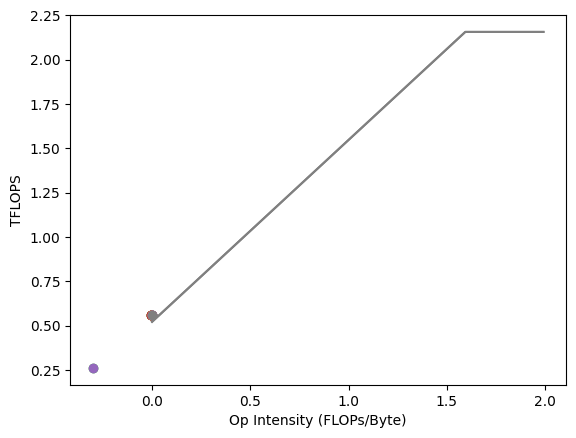

In [3]:
decode_moddeling(model=model,
                 batch_size=batch_size,
                 Bb=1,
                 input_tokens=input_tokens,
                 output_tokens=output_tokens,
                 model_profilling=False,
                 system_name='SPR_HBM3e',
                 bits='bf16',
                 tensor_parallel=1,
                 pipeline_parallel=1,
                 debug=True,
                 time_breakdown=True)